In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('HRDataset_v14.csv', sep=",")

In [6]:
# размер набора данных
data.shape

(311, 36)

In [7]:
# типы колонок
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [8]:
# проверим есть ли пропущенные значения
isnull = data.isnull().sum()
print (isnull)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [9]:
# Первые 5 строк датасета
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [10]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 311


# Обработка пропусков в данных

## 1) Удаление значений

In [11]:
# Удаление колонок, содержащих пустые значения
newdata1 = data.dropna(axis=1, how='any')
(data.shape, newdata1.shape)

((311, 36), (311, 34))

In [12]:
newdata1.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
RecruitmentS

In [13]:
# Удаление строк, содержащих пустые значения
newdata2 = data.dropna(axis=0, how='any')
(data.shape, newdata2.shape)

((311, 36), (104, 36))

In [14]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 2) Обработка пропусков в числовых данных

In [15]:
mass1 = []
mass2 = []
mass3 = []
for key in isnull.keys():
    elem = []
    if isnull[key] != 0:
        elem.append(key)
        elem.append(data[key].dtype)
        elem.append(isnull[key])
        elem.append(round(isnull[key] / data.shape[0] * 100, 5))
        mass1.append(elem)
    if isnull[key] != 0 and (str(data[key].dtype) == 'float64' or str(data[key].dtype) == 'int64'):
        mass2.append(elem)
    if isnull[key] != 0 and str(data[key].dtype) == 'object':
        mass3.append(elem)
data_num_obj = []
for key in mass1:
    data_num_obj.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

DateofTermination - object - (207) 66.55949%
ManagerID - float64 - (8) 2.57235%


In [17]:
data_num=[]
for key in mass2:
    data_num.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

ManagerID - float64 - (8) 2.57235%


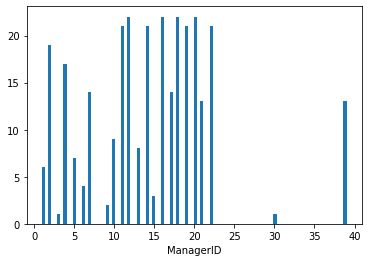

In [18]:
for key in mass2:
    plt.hist(data[key[0]], 100)
    plt.xlabel(key[0])
    plt.show()

In [28]:
sort_null_data = data[data_num]
data_ManagerID = sort_null_data[['ManagerID']]
data_ManagerID.head()

,ManagerID
0,22.0
1,4.0
2,20.0
3,16.0
4,39.0


# SimpleImputer

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [30]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_ManagerID)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [31]:
strategies=['mean', 'median', 'most_frequent']

In [34]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_ManagerID)
    return data_num_imp[mask_missing_values_only]

In [35]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([14.5709571, 14.5709571, 14.5709571, 14.5709571, 14.5709571,
        14.5709571, 14.5709571, 14.5709571]))

In [36]:
strategies[1], test_num_impute(strategies[1])

('median', array([15., 15., 15., 15., 15., 15., 15., 15.]))

In [37]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([12., 12., 12., 12., 12., 12., 12., 12.]))

# Обработка категориальных признаков

In [40]:
for key in mass3:
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

DateofTermination - object - (207) 66.55949%


In [41]:
sort_null_data_obj = data[data_num_obj]
data_RaceDesc = sort_null_data_obj[['DateofTermination']]
data_RaceDesc.head()

,DateofTermination
0,NaN
1,6/16/2016
2,9/24/2012
3,NaN
4,9/6/2016


In [45]:
implicator = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
RaceDesc_values = implicator.fit_transform(data_RaceDesc)
RaceDesc_values

array([['NA'],
       ['6/16/2016'],
       ['9/24/2012'],
       ['NA'],
       ['9/6/2016'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['1/12/2017'],
       ['9/19/2016'],
       ['NA'],
       ['NA'],
       ['4/6/2017'],
       ['8/4/2017'],
       ['NA'],
       ['NA'],
       ['9/12/2015'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['4/4/2014'],
       ['2/19/2016'],
       ['NA'],
       ['8/7/2014'],
       ['6/15/2013'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['8/2/2014'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['11/15/2015'],
       ['NA'],
       ['NA'],
       ['1/7/2013'],
       ['9/26/2011'],
       ['NA'],
       ['NA'],
       ['9/23/2016'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['NA'],
  

In [43]:
data_RaceDesc['DateofTermination'].unique()

array([nan, '6/16/2016', '9/24/2012', '9/6/2016', '1/12/2017',
       '9/19/2016', '4/6/2017', '8/4/2017', '9/12/2015', '4/4/2014',
       '2/19/2016', '8/7/2014', '6/15/2013', '8/2/2014', '11/15/2015',
       '1/7/2013', '9/26/2011', '9/23/2016', '6/8/2016', '11/4/2015',
       '6/6/2017', '9/27/2018', '2/25/2018', '6/5/2013', '5/17/2016',
       '6/24/2013', '1/9/2013', '8/19/2018', '11/15/2016', '9/5/2015',
       '6/25/2015', '3/15/2015', '5/30/2011', '1/11/2014', '10/31/2014',
       '12/15/2015', '6/18/2013', '4/7/2012', '4/15/2015', '4/1/2013',
       '4/29/2018', '4/1/2016', '4/24/2014', '6/4/2015', '1/9/2014',
       '12/12/2015', '3/31/2014', '4/15/2013', '9/26/2018', '9/15/2016',
       '11/14/2015', '9/26/2017', '8/19/2012', '11/11/2016', '9/4/2014',
       '5/25/2016', '5/1/2018', '8/19/2013', '1/12/2014', '9/7/2015',
       '5/1/2016', '12/28/2017', '9/15/2015', '10/25/2015', '2/4/2013',
       '5/18/2016', '11/30/2012', '6/4/2018', '8/15/2015', '4/7/2018',
       '1/15/2

# Кодирование категориальных признаков

In [47]:
data_frame = pd.DataFrame({'DateofTerminations': RaceDesc_values.T[0]})

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [56]:
le = LabelEncoder()
data_label_le = le.fit_transform(data_frame)

C:\Users\Superuser\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
data_frame['DateofTerminations'].unique()

array(['NA', '6/16/2016', '9/24/2012', '9/6/2016', '1/12/2017',
       '9/19/2016', '4/6/2017', '8/4/2017', '9/12/2015', '4/4/2014',
       '2/19/2016', '8/7/2014', '6/15/2013', '8/2/2014', '11/15/2015',
       '1/7/2013', '9/26/2011', '9/23/2016', '6/8/2016', '11/4/2015',
       '6/6/2017', '9/27/2018', '2/25/2018', '6/5/2013', '5/17/2016',
       '6/24/2013', '1/9/2013', '8/19/2018', '11/15/2016', '9/5/2015',
       '6/25/2015', '3/15/2015', '5/30/2011', '1/11/2014', '10/31/2014',
       '12/15/2015', '6/18/2013', '4/7/2012', '4/15/2015', '4/1/2013',
       '4/29/2018', '4/1/2016', '4/24/2014', '6/4/2015', '1/9/2014',
       '12/12/2015', '3/31/2014', '4/15/2013', '9/26/2018', '9/15/2016',
       '11/14/2015', '9/26/2017', '8/19/2012', '11/11/2016', '9/4/2014',
       '5/25/2016', '5/1/2018', '8/19/2013', '1/12/2014', '9/7/2015',
       '5/1/2016', '12/28/2017', '9/15/2015', '10/25/2015', '2/4/2013',
       '5/18/2016', '11/30/2012', '6/4/2018', '8/15/2015', '4/7/2018',
       '1/15/

In [58]:
data_label_le

array([96, 55, 84, 96, 94, 96, 96, 96, 96, 96,  2, 82, 96, 96, 42, 76, 96,
       96, 79, 96, 96, 96, 96, 96, 41, 24, 96, 77, 54, 96, 96, 96, 74, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 16, 96, 96,  6, 86,
       96, 96, 83, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 65, 96, 96,
       19, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 64, 96, 96, 96, 89,
       27, 63, 96, 96, 50, 96, 96, 96, 57,  7, 73, 96, 96, 96, 96, 96, 96,
       96, 17, 92, 58, 96, 96, 32, 96, 96, 96, 53, 96, 96, 96, 96, 96, 96,
        0, 96, 11, 96, 96, 21, 96, 96, 56, 96, 43, 96, 96, 37, 96, 96, 96,
       34, 84, 96, 96, 96, 96, 96, 40, 96, 96, 35, 39, 96, 96, 96, 61,  8,
       96, 96, 96, 96, 20, 33, 96, 96, 36, 96, 73, 96, 96, 96, 96, 88, 96,
       96, 81, 96, 96, 15, 87, 96, 96, 71, 96, 96, 96, 96, 96, 96, 14, 96,
       96, 91, 96, 96, 96, 96, 96, 96, 96, 96, 96, 41, 52, 96, 96, 96, 96,
       96, 47, 72, 96, 96, 96, 96,  1, 95, 46, 22, 80, 10, 28, 51, 96, 96,
       18, 96, 96, 62, 96

In [59]:
one = OneHotEncoder()
data_label_hot = one.fit_transform(data_frame)

In [60]:
data_label_hot

<311x97 sparse matrix of type '<class 'numpy.float64'>'
	with 311 stored elements in Compressed Sparse Row format>

In [61]:
data_label_hot.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.

In [62]:
data_frame.head(10)

,DateofTerminations
0,NA
1,6/16/2016
2,9/24/2012
3,NA
4,9/6/2016
5,NA
6,NA
7,NA
8,NA
9,NA


### с помощью Pandas

In [64]:
pd.get_dummies(data_frame).head()

,DateofTerminations_1/11/2014,DateofTerminations_1/12/2014,DateofTerminations_1/12/2017,DateofTerminations_1/15/2016,DateofTerminations_1/2/2012,DateofTerminations_1/26/2016,DateofTerminations_1/7/2013,DateofTerminations_1/9/2013,DateofTerminations_1/9/2014,DateofTerminations_10/22/2011,...,DateofTerminations_9/26/2017,DateofTerminations_9/26/2018,DateofTerminations_9/27/2018,DateofTerminations_9/29/2015,DateofTerminations_9/4/2014,DateofTerminations_9/5/2015,DateofTerminations_9/5/2016,DateofTerminations_9/6/2016,DateofTerminations_9/7/2015,DateofTerminations_NA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
pd.get_dummies(data_frame, dummy_na=True).head()

,DateofTerminations_1/11/2014,DateofTerminations_1/12/2014,DateofTerminations_1/12/2017,DateofTerminations_1/15/2016,DateofTerminations_1/2/2012,DateofTerminations_1/26/2016,DateofTerminations_1/7/2013,DateofTerminations_1/9/2013,DateofTerminations_1/9/2014,DateofTerminations_10/22/2011,...,DateofTerminations_9/26/2018,DateofTerminations_9/27/2018,DateofTerminations_9/29/2015,DateofTerminations_9/4/2014,DateofTerminations_9/5/2015,DateofTerminations_9/5/2016,DateofTerminations_9/6/2016,DateofTerminations_9/7/2015,DateofTerminations_NA,DateofTerminations_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Масштабирование данных

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [70]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Salary']])

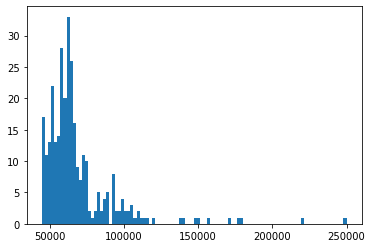

In [71]:
plt.hist(data[['Salary']], 100)
plt.show()

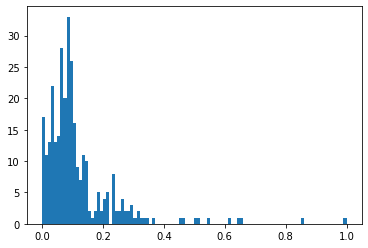

In [72]:
plt.hist(sc1_data, 100)
plt.show()

## Масштабирование данных на основе Z-оценки

In [74]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Salary']])

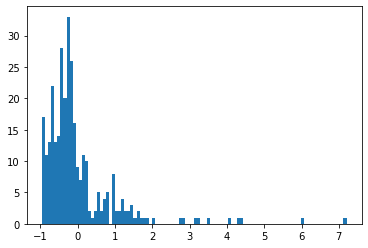

In [80]:
plt.hist(sc2_data, 100)
plt.show()